<a href="https://colab.research.google.com/github/dineshsainii/computer_vision/blob/master/Image_Classification_with_Logistic_Regression_Jovian.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [11]:
!wget www.di.ens.fr/~lelarge/MNIST.tar.gz
!tar -zxvf MNIST.tar.gz

--2021-03-26 01:00:06--  http://www.di.ens.fr/~lelarge/MNIST.tar.gz
Resolving www.di.ens.fr (www.di.ens.fr)... 129.199.99.14
Connecting to www.di.ens.fr (www.di.ens.fr)|129.199.99.14|:80... connected.
HTTP request sent, awaiting response... 302 Found
Location: https://www.di.ens.fr/~lelarge/MNIST.tar.gz [following]
--2021-03-26 01:00:07--  https://www.di.ens.fr/~lelarge/MNIST.tar.gz
Connecting to www.di.ens.fr (www.di.ens.fr)|129.199.99.14|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: unspecified [application/x-gzip]
Saving to: ‘MNIST.tar.gz’

MNIST.tar.gz            [              <=>   ]  33.20M  9.75MB/s    in 3.4s    

2021-03-26 01:00:11 (9.75 MB/s) - ‘MNIST.tar.gz’ saved [34813078]

MNIST/
MNIST/raw/
MNIST/raw/train-labels-idx1-ubyte
MNIST/raw/t10k-labels-idx1-ubyte.gz
MNIST/raw/t10k-labels-idx1-ubyte
MNIST/raw/t10k-images-idx3-ubyte.gz
MNIST/raw/train-images-idx3-ubyte
MNIST/raw/train-labels-idx1-ubyte.gz
MNIST/raw/t10k-images-idx3-ubyte
MNIST/raw/tra

In [12]:
train_set = MNIST('./', download=True,
transform=transforms.Compose([
transforms.ToTensor(),
]), train=True)

test_set = MNIST('./', download=True,
transform=transforms.Compose([
transforms.ToTensor(),
]), train=False)

In [60]:
len(train_set), len(test_set)

(60000, 10000)

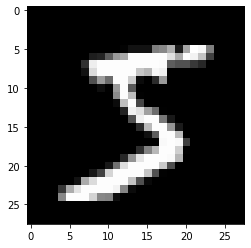

In [28]:
import matplotlib.pyplot as plt
%matplotlib inline
img,label = train_set[0]
plt.imshow(img[0,:,:],cmap='gray')

In [9]:
import torch #pytorch
import torchvision #helper library for computer vision
from torchvision.datasets import MNIST
import torchvision.transforms as transforms

In [17]:
dataset = MNIST(root='data/',download=True)


Extracting data/MNIST/raw/train-images-idx3-ubyte.gz to data/MNIST/raw



Extracting data/MNIST/raw/train-labels-idx1-ubyte.gz to data/MNIST/raw



Extracting data/MNIST/raw/t10k-images-idx3-ubyte.gz to data/MNIST/raw



Extracting data/MNIST/raw/t10k-labels-idx1-ubyte.gz to data/MNIST/raw
Processing...
Done!


/usr/local/lib/python3.7/dist-packages/torchvision/datasets/mnist.py:479: UserWarning: The given NumPy array is not writeable, and PyTorch does not support non-writeable tensors. This means you can write to the underlying (supposedly non-writeable) NumPy array using the tensor. You may want to copy the array to protect its data or make it writeable before converting it to a tensor. This type of warning will be suppressed for the rest of this program. (Triggered internally at  /pytorch/torch/csrc/utils/tensor_numpy.cpp:143.)
  return torch.from_numpy(parsed.astype(m[2], copy=False)).view(*s)


In [61]:
len(dataset)

60000

In [20]:
test_dataset = MNIST(root='data/', train=False)
len(test_dataset)

10000

In [62]:
dataset[0]

(tensor([[[0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
           0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
           0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
           0.0000, 0.0000, 0.0000, 0.0000],
          [0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
           0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
           0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
           0.0000, 0.0000, 0.0000, 0.0000],
          [0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
           0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
           0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
           0.0000, 0.0000, 0.0000, 0.0000],
          [0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
           0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
           0.0000, 0.0000, 0.0000, 0.0000, 

In [22]:
import matplotlib.pyplot as plt
%matplotlib inline

Label:  5


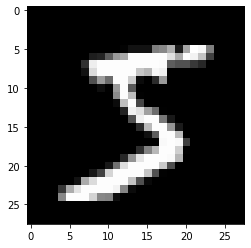

In [23]:
image, label = dataset[0]
plt.imshow(image,cmap='gray')
print("Label: ", label)

TypeError: ignored

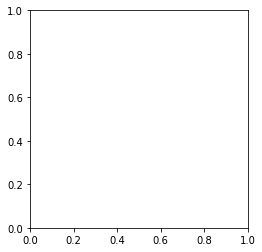

In [63]:
image, label = dataset[10]
plt.imshow(image,cmap='gray')
print("Label: ",label)

In [64]:
import torchvision.transforms as transforms
dataset = MNIST(root='data/',train=True,transform=transforms.ToTensor())

In [65]:
img_tensor, label = dataset[0]
print(img_tensor.shape, label)

torch.Size([1, 28, 28]) 5


In [30]:
print(img_tensor[:,10:15,10:15])
print(torch.max(img_tensor), torch.min(img_tensor))

tensor([[[0.0039, 0.6039, 0.9922, 0.3529, 0.0000],
         [0.0000, 0.5451, 0.9922, 0.7451, 0.0078],
         [0.0000, 0.0431, 0.7451, 0.9922, 0.2745],
         [0.0000, 0.0000, 0.1373, 0.9451, 0.8824],
         [0.0000, 0.0000, 0.0000, 0.3176, 0.9412]]])
tensor(1.) tensor(0.)


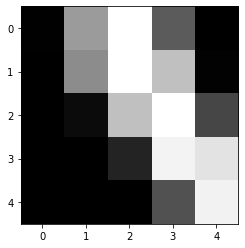

In [31]:
plt.imshow(img_tensor[0,10:15,10:15], cmap='gray')

In [32]:
from torch.utils.data import random_split
train_ds, val_ds = random_split(dataset,[50000,10000])
len(train_ds), len(val_ds)

(50000, 10000)

In [30]:
import numpy as np
nval = 4
idx = np.random.permutation(10)
print(idx)
print(idx[nval:])
print(idx[:nval])

[7 9 6 2 1 5 8 0 4 3]
[1 5 8 0 4 3]
[7 9 6 2]


In [37]:
from torch.utils.data import DataLoader
batch_size = 128
train_loader = DataLoader(train_ds,batch_size,shuffle=True)
val_loader = DataLoader(val_ds,batch_size)

In [33]:
import torch.nn as nn
input_size = 28*28
num_classes = 10
#Logistic Regression Model
model = nn.Linear(input_size, num_classes)

In [35]:
print(model.weight.shape)
print(model.bias.shape)

torch.Size([10, 784])
torch.Size([10])


In [38]:
#Will give an error because images is in shape 1x28x28 while we need it in 784
for images, labels in train_loader:
  print(labels)
  print(images.shape)
  outputs = model(images)
  break

tensor([2, 5, 8, 9, 1, 5, 5, 9, 7, 4, 3, 9, 2, 3, 5, 3, 6, 0, 1, 6, 0, 0, 5, 0,
        2, 1, 2, 7, 9, 3, 1, 2, 3, 8, 7, 4, 9, 8, 7, 8, 1, 3, 7, 0, 4, 6, 9, 3,
        2, 8, 3, 0, 7, 6, 1, 6, 8, 1, 2, 1, 1, 2, 3, 1, 4, 5, 8, 4, 4, 2, 7, 7,
        6, 6, 7, 0, 4, 0, 6, 9, 5, 0, 1, 5, 3, 2, 6, 9, 9, 6, 6, 8, 5, 2, 6, 6,
        9, 2, 4, 4, 8, 5, 8, 3, 2, 6, 6, 3, 4, 5, 4, 4, 5, 4, 9, 7, 9, 1, 1, 2,
        7, 5, 1, 2, 7, 1, 6, 9])
torch.Size([128, 1, 28, 28])


RuntimeError: ignored

In [39]:
class MnistModel(nn.Module):
  def __init__(self):
    super().__init__()
    self.linear = nn.Linear(input_size, num_classes)
  def forward(self, xb):
    xb = xb.reshape(-1,784)
    out = self.linear(xb)
    return out
model = MnistModel()

In [41]:
for images, labels in train_loader:
  outputs = model(images)
  break
print('outputs.shape: ',outputs.shape)
print('Sample outpus ', outputs[:2].data)

outputs.shape:  torch.Size([128, 10])
Sample outpus  tensor([[ 0.5524,  0.2585, -0.1209,  0.2699,  0.4448,  0.0571,  0.0139,  0.0616,
         -0.0028,  0.1583],
        [ 0.4286,  0.1116, -0.2077,  0.5357,  0.1228, -0.0665, -0.1179,  0.2691,
         -0.1401, -0.0663]], grad_fn=<SliceBackward>)


In [43]:
import torch.nn.functional as F

In [49]:
#Apply softmax to each output
probs = F.softmax(outputs, dim=1)
#sample probablities
print("Sample Probabilities :: ",probs[:2])
#Adding probabilities of an output row to check whether the sum is 1 or not
print("Sum : ",torch.sum(probs[0]).item())

Sample Probabilities ::  tensor([[0.1437, 0.1071, 0.0733, 0.1083, 0.1290, 0.0875, 0.0838, 0.0879, 0.0825,
         0.0969],
        [0.1365, 0.0994, 0.0723, 0.1520, 0.1006, 0.0832, 0.0790, 0.1164, 0.0773,
         0.0832]], grad_fn=<SliceBackward>)
Sum :  1.000000238418579


In [50]:
max_prob, preds = torch.max(probs,dim=1)
print(preds)
print(max_prob)

tensor([0, 3, 4, 9, 2, 0, 3, 9, 2, 4, 4, 4, 4, 3, 9, 9, 5, 3, 0, 5, 3, 3, 5, 2,
        5, 0, 2, 3, 4, 3, 0, 3, 5, 3, 3, 3, 6, 1, 7, 2, 3, 3, 0, 3, 0, 9, 4, 4,
        4, 3, 0, 5, 3, 9, 5, 5, 4, 4, 4, 3, 4, 3, 0, 4, 3, 4, 4, 4, 5, 3, 2, 4,
        4, 4, 3, 5, 4, 3, 3, 0, 5, 4, 4, 3, 0, 0, 3, 4, 3, 4, 5, 3, 4, 3, 4, 4,
        3, 9, 3, 6, 3, 4, 3, 4, 7, 0, 2, 9, 3, 2, 5, 9, 2, 4, 5, 2, 4, 4, 3, 4,
        4, 9, 4, 5, 9, 4, 5, 5])
tensor([0.1437, 0.1520, 0.1361, 0.1162, 0.1261, 0.1351, 0.1362, 0.1367, 0.1510,
        0.1307, 0.1205, 0.1628, 0.1489, 0.1311, 0.1299, 0.1276, 0.1280, 0.1383,
        0.1485, 0.1225, 0.1271, 0.1467, 0.1420, 0.1207, 0.1529, 0.1404, 0.1331,
        0.1335, 0.1246, 0.1400, 0.1266, 0.1325, 0.1331, 0.1305, 0.1579, 0.1379,
        0.1251, 0.1314, 0.1347, 0.1355, 0.1288, 0.1299, 0.1270, 0.1286, 0.1176,
        0.1372, 0.1328, 0.1441, 0.1309, 0.1331, 0.1250, 0.1218, 0.1499, 0.1355,
        0.1334, 0.1286, 0.1526, 0.1159, 0.1454, 0.1196, 0.1385, 0.1502, 0.1328,
       

In [66]:
labels

tensor([8, 3, 4, 5, 6, 5, 3, 1, 6, 0, 6, 8, 7, 1, 6, 4, 3, 2, 2, 9, 4, 8, 2, 0,
        7, 7, 6, 1, 5, 5, 3, 5, 5, 8, 6, 4, 2, 3, 3, 6, 1, 4, 3, 3, 5, 3, 5, 9,
        2, 3, 2, 8, 9, 3, 7, 9, 7, 1, 9, 8, 0, 3, 2, 6, 1, 3, 0, 6, 7, 2, 2, 0,
        8, 4, 7, 9, 7, 6, 6, 0, 7, 0, 7, 6, 4, 0, 6, 5, 5, 9, 3, 3, 6, 5, 7, 0,
        5, 1, 0, 0, 5, 5, 0, 7, 3, 2, 6, 4, 6, 0, 4, 7, 6, 8, 0, 0, 9, 8, 4, 9,
        1, 1, 7, 7, 3, 8, 4, 9])

In [52]:
#Check Accuracy how many preds are same as labels
def accuracy(outputs,labels):
  _, preds = torch.max(outputs,dim=1)
  return torch.tensor(torch.sum(preds==labels).item()/len(preds))

In [67]:
accuracy(outputs,labels)

tensor(0.0938)

In [58]:
loss_fn = F.cross_entropy

In [68]:
loss = loss_fn(outputs, labels)
print(loss)

tensor(2.2909, grad_fn=<NllLossBackward>)


In [100]:
class MnistModel(nn.Module):
  def __init__(self):
    super().__init__()
    self.linear = nn.Linear(input_size, num_classes)
  
  def forward(self, xb):
    xb = xb.reshape(-1,784)
    out = self.linear(xb)
    return out
  def training_step(self, batch):
    images, labels = batch
    out = self(images)                  #Calculate predictions
    loss = F.cross_entropy(out, labels) # calculating loss
    return loss
  def validation_step(self, batch):
    images, labels = batch
    out = self(images)                  #predictions
    loss = F.cross_entropy(out, labels) #loss
    acc = accuracy(out,labels)          #Accuracy
    return {'val_loss':loss,'val_acc':acc}

    #understand what's going on
  def validation_epoch_end(self, outputs):
    batch_losses = [x['val_loss'] for x in outputs]
    epoch_loss = torch.stack(batch_losses).mean()   #combine losses
    batch_accs = [x['val_acc'] for x in outputs]
    epoch_acc = torch.stack(batch_accs).mean()        #combine losses
    return {'val_loss':epoch_loss.item(), 'val_acc':epoch_acc.item()}
  
  def epoch_end(self, epoch, result):
    print("Epoch [{}], val_loss : {:.4f}, val_acc : {:.4f}".format(epoch, result['val_loss'], result['val_acc']))

model = MnistModel()

In [104]:
def evaluate(model, val_loader):
  outputs = [model.validation_step(batch) for batch in val_loader]
  return model.validation_epoch_end(outputs)
def fit(epochs, lr, model, train_loader, val_loader, opt_func = torch.optim.SGD):
  history = []
  optimizer = opt_func(model.parameters(),lr)
  for epoch in range(epochs):
    #Training Phase
    for batch in train_loader:
      loss = model.training_step(batch)
      loss.backward()
      optimizer.step()
      optimizer.zero_grad()
    #Validation phase
    result = evaluate(model, val_loader)
    model.epoch_end(epoch, result)
    history.append(result)
  return history

In [102]:
result0 = evaluate(model, val_loader)
result0

{'val_acc': 0.0995846539735794, 'val_loss': 2.332552909851074}

In [105]:
history1 = fit(5,0.001, model,train_loader, val_loader)

Epoch [0], val_loss : 1.9664, val_acc : 0.5733
Epoch [1], val_loss : 1.6953, val_acc : 0.7283
Epoch [2], val_loss : 1.4916, val_acc : 0.7621
Epoch [3], val_loss : 1.3376, val_acc : 0.7797
Epoch [4], val_loss : 1.2190, val_acc : 0.7925


In [106]:
history2 = fit(5,0.001, model,train_loader, val_loader)

Epoch [0], val_loss : 1.1260, val_acc : 0.8017
Epoch [1], val_loss : 1.0514, val_acc : 0.8094
Epoch [2], val_loss : 0.9905, val_acc : 0.8171
Epoch [3], val_loss : 0.9399, val_acc : 0.8233
Epoch [4], val_loss : 0.8971, val_acc : 0.8265


In [107]:
history3 = fit(5,0.001, model,train_loader, val_loader)

Epoch [0], val_loss : 0.8605, val_acc : 0.8315
Epoch [1], val_loss : 0.8288, val_acc : 0.8340
Epoch [2], val_loss : 0.8011, val_acc : 0.8377
Epoch [3], val_loss : 0.7766, val_acc : 0.8408
Epoch [4], val_loss : 0.7548, val_acc : 0.8435


In [108]:
history4 = fit(5,0.001, model,train_loader, val_loader)

Epoch [0], val_loss : 0.7353, val_acc : 0.8462
Epoch [1], val_loss : 0.7177, val_acc : 0.8493
Epoch [2], val_loss : 0.7017, val_acc : 0.8505
Epoch [3], val_loss : 0.6871, val_acc : 0.8526
Epoch [4], val_loss : 0.6738, val_acc : 0.8539


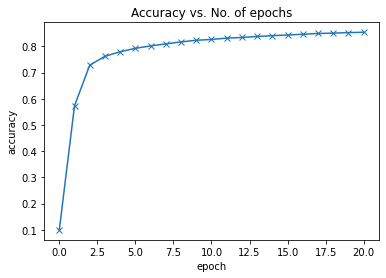

In [109]:
history = [result0]+history1+history2+history3+history4
accuracies = [result['val_acc'] for result in history]
plt.plot(accuracies,'-x')
plt.xlabel('epoch')
plt.ylabel('accuracy')
plt.title('Accuracy vs. No. of epochs');

In [110]:
#Test with individual images
# Define test dataset
test_dataset = MNIST(root='data/', 
                     train=False,
                     transform=transforms.ToTensor())

Shape :  torch.Size([1, 28, 28])
label :  7


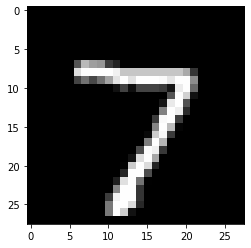

In [116]:
img, label = test_dataset[0]
plt.imshow(img[0],cmap='gray')
print('Shape : ', image.shape)
print('label : ', label)

In [117]:
#Unsqueeze to make it a batch of size 1
img.unsqueeze(0).shape

torch.Size([1, 1, 28, 28])

In [118]:
def predict_image(img, model):
    xb = img.unsqueeze(0)
    yb = model(xb)
    _, preds  = torch.max(yb, dim=1)
    return preds[0].item()

Label: 7 , Predicted: 7


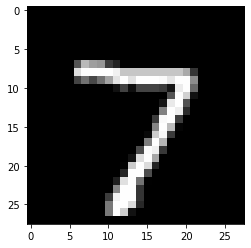

In [121]:
img, label = test_dataset[0]
plt.imshow(img[0], cmap='gray')
print('Label:', label, ', Predicted:', predict_image(img, model))